# DAS-732 ASSIGNMENT-3 TEAM - GRAPHGEEKS
### MEMBERS:
- ASHIRWAD MISHRA IMT2022108 (Team Lead)
- KRISH PATEL IMT2022097
- VANSH SINHA IMT2022122

## Original Dataset description and Visual Analytics Workflow

![VA_workflow](Workflow.png)

### Column-wise Description of Dataset

1. **Commodity Code**  
   - Code representing the commodity or industry from BEA Make and Use Tables 2012.  
   - Includes two levels: 'Detail' (405 sectors) and 'Summary' (medium resolution, 73 commodities & 71 industries).  

2. **Commodity Name**  
   - Name of the commodity or industry.  
   - Detail commodities use USEEIO v1.1 names.

3. **Substance**  
   - Greenhouse gases:  
     - CO2: Carbon dioxide  
     - CH4: Methane  
     - N2O: Nitrous oxide  
     - Other GHGs: HFCs, CF4, SF6, etc.

4. **Unit**  
   - Emission factors in CO2e (carbon dioxide equivalents) using IPCC AR4 GWP factors.  
   - Purchaser price includes producer price + margins.

5. **Supply Chain Emission Factors without Margins**  
   - GHG emissions from cradle to production point (kg) per 2018 USD.

6. **Margins of Supply Chain Emission Factors**  
   - GHG emissions from production to sale (kg) per 2018 USD.

7. **Supply Chain Emission Factors with Margins**  
   - GHG emissions from cradle to sale (kg) per 2018 USD.

8. **DQ Reliability Score of Factors without Margins**  
   - Data reliability score (1 = best, 5 = worst).  

9. **DQ Temporal Correlation of Factors without Margins**  
   - Temporal correlation score (1 = best, 5 = worst).  

10. **DQ Geographical Correlation of Factors without Margins**  
    - Geographical correlation score (1 = best, 5 = worst).  

11. **DQ Technological Correlation of Factors without Margins**  
    - Technological correlation score (1 = best, 5 = worst).  

12. **DQ Data Collection of Factors without Margins**  
    - Data collection score (1 = best, 5 = worst).  

13. **Year**  
    - Added column indicating the year of data recording (created during dataset cleaning).


### Additional Dataset is quite comprehensive and not all of it was used in this assignment, hence would be described whenever invoked into a workflow iteration.

## VISUAL ANALYTICS WORKFLOW

- **Choose Dataset for Model Training:**  
  The workflow begins with selecting a dataset for model training. This dataset contains the primary emission data used for analysis.

- **Emission Data and Additional Data:**  
  These are the primary sources of information. *Emission data* represents the core dataset, while *additional data* complements it by providing supplementary information.

- **Cleaning Process:**  
  The raw data (both emission and additional) undergoes a cleaning process to ensure consistency, completeness, and readiness for analysis. This process removes invalid or missing values, standardizes formats, and prepares the datasets for downstream tasks.

- **Clean Emission Data and Clean Additional Data:**  
  After the cleaning process, the emission and additional datasets are stored separately as cleaned datasets. These cleaned datasets are critical for ensuring accurate analysis and visualization.

- **Visualizations:**  
  Cleaned datasets are transformed into visual representations, facilitating the mapping of data insights. These visualizations highlight patterns, trends, and anomalies in the emission data and serve as a precursor for further modeling.

- **Model:**  
  This component involves the application of machine learning or statistical models on the cleaned data. Models are trained to extract inferences, predict trends, and provide actionable insights.

- **Knowledge:**  
  The end goal of the workflow is to convert data into knowledge. Insights derived from visualizations and models are aggregated, validated, and presented as meaningful knowledge to stakeholders.


- **Subflow-1:**  
  Connects visualizations to the knowledge component with a feedback loop for iterative refinement of visual representations, enhancing data interpretation.

- **Subflow-2:**  
  Links cleaned additional data to visualizations and knowledge. Introduces a feedback loop to refine how supplementary information enriches the analysis.

- **Subflow-3:**  
  Focuses on applying machine learning models. Involves selecting, cleaning, and preparing datasets (emission or additional data) and training ML models to extract insights.


## TASKS UNDERTAKEN IN THIS ASSIGNMENT:
- **Task 1: Industry-Level Emissions Over Time:**  
  Analyze historical GHG emissions by industries to identify trends, key contributors, and changes over time.

- **Task 2: Commodity-Specific Emissions and Their Drivers:**  
  Examine the link between commodity sales and emissions to identify high-emission products and their drivers.

- **Task 3: Deeper Analysis into Specific Sectors' Emissions:**  
  Perform detailed evaluations of emissions within sectors to explore variability and high-emission sub-sectors.


# Assignment-3 Visual Analytics

### Task 3: Deeper Analysis into Specific Sectors' Emissions
Ashirwad Mishra


## Part-1 : Utilities Splitted Emissions Analysis

Utilities has a huge chunk of emissions from CO2 as compareed to the other GHG gases. The utilities sector encompasses the stock of companies operating in electric, gas, and water utilities. 

Electricity emission data (additional) + CO2 emissions only to create new viz. (SubFlow-2)

![Utilities Industry stacked bar chart](util_ind_split.png)

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


 Chloropleth - to get state-wise emission factors in order to gain insights on which regions contribute the most (2011)

In [2]:
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
elec_df = pd.read_excel(file_path, sheet_name='Utils-elec')
elec_df.drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
elec_df

,Subregion,CO2 Factor,CH4 Factor,N2O Factor
0,NaN,(lb CO2 /MWh),(lb CH4 /MWh),(lb N2O /MWh)
1,AKGD (ASCC Alaska Grid),1284.72,0.02711,0.00744
2,AKMS (ASCC Miscellaneous),535.73,0.02265,0.00448
3,AZNM (WECC Southwest),1252.61,0.0188,0.01657
4,CAMX (WECC California),681.01,0.02829,0.00623
5,ERCT (ERCOT All),1252.57,0.01776,0.01399
6,FRCC (FRCC All),1220.11,0.04119,0.01525
7,HIMS (HICC Miscellaneous),1343.82,0.13515,0.02171
8,HIOA (HICC Oahu),1620.76,0.09105,0.02089
9,MROE (MRO East),1692.32,0.02879,0.02905


- A dictionary is created to map the Electricity board names to the state code used in the plotly library.
- This dictionary will be recreated for the 2024 dataset because the source data has updated the Electricity board names and their format has changed.

In [3]:


import plotly.express as px
import pandas as pd

subregion_to_states = {
    "AKGD (ASCC Alaska Grid)": ["AK"],
    "AKMS (ASCC Miscellaneous)": ["AK"],
    "AZNM (WECC Southwest)": ["AZ", "NM", "NV", "UT"],
    "CAMX (WECC California)": ["CA"],
    "ERCT (ERCOT All)": ["TX"],
    "FRCC (FRCC All)": ["FL"],
    "HIMS (HICC Miscellaneous)": ["HI"],
    "HIOA (HICC Oahu)": ["HI"],
    "MROE (MRO East)": ["MN", "WI", "IA"],
    "MROW (MRO West)": ["ND", "SD", "NE", "KS", "MT", "WY"],
    "NEWE (NPCC New England)": ["ME", "NH", "VT", "MA", "RI", "CT"],
    "NWPP (WECC Northwest)": ["WA", "OR", "ID", "MT"],
    "NYCW (NPCC NYC/Westchester)": ["NY"],
    "NYLI (NPCC Long Island)": ["NY"],
    "NYUP (NPCC Upstate NY)": ["NY"],
    "RFCE (RFC East)": ["PA", "NJ", "DE", "MD", "DC"],
    "RFCM (RFC Michigan)": ["MI"],
    "RFCW (RFC West)": ["OH", "IN", "IL", "KY", "MO", "WV"],
    "RMPA (WECC Rockies)": ["CO", "WY"],
    "SPNO (SPP North)": ["MO", "KS", "NE"],
    "SPSO (SPP South)": ["OK", "TX"],
    "SRMV (SERC Mississippi Valley)": ["AR", "MS", "LA"],
    "SRMW (SERC Midwest)": ["MO", "IL", "AR", "KY"],
    "SRSO (SERC South)": ["AL", "GA"],
    "SRTV (SERC Tennessee Valley)": ["TN", "NC", "VA", "GA"],
    "SRVC (SERC Virginia/Carolina)": ["SC", "NC", "VA"],
}

# Prepare a state-wise CO2 Factor dataset
state_emissions = []
for subregion, states in subregion_to_states.items():
    if subregion in elec_df['Subregion'].values:
        co2_factor = elec_df.loc[elec_df['Subregion'] == subregion, 'CO2 Factor'].values[0]
        for state in states:
            state_emissions.append({"State": state, "CO2 Factor": co2_factor})

# Create a DataFrame for state emissions
state_emissions_df = pd.DataFrame(state_emissions)


### Creating the Chloropleth plot for 2011 Electricity emission data

In [4]:
# Create a choropleth map using state abbreviations
fig = px.choropleth(
    state_emissions_df,
    locations="State",  # State abbreviations
    locationmode="USA-states",  # Match state abbreviations
    color="CO2 Factor",
    scope="usa",
    color_continuous_scale="Agsunset_r",
    title="CO2 Emissions by State Based on Subregion 2011"
)

# Update layout
fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

# Display the map
fig.show()

 Chloropleth - to get state-wise emission factors in order to gain insights on which regions contribute the most (2024)

As mentioned previously, a new dicionary is created with different key names as before due to change in Name format of the electricity boards.

In [5]:
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
elec_df_2024 = pd.read_excel(file_path, sheet_name='Utils-elec-2024')
elec_df_2024.drop(index=range(0,1),inplace=True)
elec_df_2024.reset_index(drop=True,inplace=True)
elec_df_2024.rename(columns={'eGRID Subregion Name':'Subregion'},inplace=True)

subregion_to_states = {
    "ASCC Alaska Grid": ["AK"],
    "ASCC Miscellaneous": ["AK"],
    "WECC Southwest": ["AZ", "NM", "NV", "UT"],
    "WECC California": ["CA"],
    "ERCOT All": ["TX"],
    "FRCC All": ["FL"],
    "HICC Miscellaneous": ["HI"],
    "HICC Oahu": ["HI"],
    "MRO East": ["MN", "WI", "IA"],
    "MRO West": ["ND", "SD", "NE", "KS", "MT", "WY"],
    "NPCC New England": ["ME", "NH", "VT", "MA", "RI", "CT"],
    "WECC Northwest": ["WA", "OR", "ID", "MT"],
    "NPCC NYC/Westchester": ["NY"],
    "NPCC Long Island": ["NY"],
    "NPCC Upstate NY": ["NY"],
    "RFC East": ["PA", "NJ", "DE", "MD", "DC"],
    "RFC Michigan": ["MI"],
    "RFC West": ["OH", "IN", "IL", "KY", "MO", "WV"],
    "WECC Rockies": ["CO", "WY"],
    "SPP North": ["MO", "KS", "NE"],
    "SPP South": ["OK", "TX"],
    "SERC Mississippi Valley": ["AR", "MS", "LA"],
    "SERC Midwest": ["MO", "IL", "AR", "KY"],
    "SERC South": ["AL", "GA"],
    "SERC Tennessee Valley": ["TN", "NC", "VA", "GA"],
    "SERC Virginia/Carolina": ["SC", "NC", "VA"]
}


# Prepare a state-wise CO2 Factor dataset for 2024 data
state_emissions_2024 = []
for subregion, states in subregion_to_states.items():
    if subregion in elec_df_2024['Subregion'].values:
        co2_factor = elec_df_2024.loc[elec_df_2024['Subregion'] == subregion, 'CO2 Factor'].values[0]
        for state in states:
            state_emissions_2024.append({"State": state, "CO2 Factor": co2_factor})

# Create a DataFrame for state emissions for 2024
state_emissions_df_2024 = pd.DataFrame(state_emissions_2024)




### Creating the Chloropleth plot for 2024 Electricity emission data

In [6]:
# Create a choropleth map using state abbreviations for 2024 data
fig = px.choropleth(
    state_emissions_df_2024,
    locations="State",  # State abbreviations
    locationmode="USA-states",  # Match state abbreviations
    color="CO2 Factor",
    scope="usa",
    color_continuous_scale="Agsunset_r",
    title="CO2 Emissions by State Based on Subregion 2024"
)

# Update layout
fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

# Display the map
fig.show()

Findings in this part are validated using survey reports mentioned in the report. They are found consistent with our analysis

## Part-2 : Heatmap of Emissions by Industry and Gas Type

- This heatmap shows us how different industries are correlated with emission factors accross different gases. We can clearly make out that the 'Air transportation' industry has very huge value of 0.872 as compared to the other industry vs gas relations.
- Knowledge gained - Air Transport contributes a lot to CO2 emissions. This can be further looked upon

![Heat Map](heat_map.png)

In iteration-2 for this workflow, we use the SubFlow-2 to add additional dataset and create new plots to analyse further

- The dataset is one of the tables in the 3 datasets which are additional to the originally used ones and it provides detailed information on CH4 (methane) and N2O (nitrous oxide) emission factors for various vehicle types and years, specifically for mobile combustion sources. Below is a detailed description of the dataset:

- Vehicle Type: Describes the type of vehicle or equipment (e.g., LPG Non-Highway Vehicles, Diesel Ships and Boats, Jet Fuel Aircraft).
- CH4 Factor (g/gallon): Indicates the methane emission factor, measured in grams per gallon of fuel consumed.
- N2O Factor (g/gallon): Indicates the nitrous oxide emission factor, measured in grams per gallon of fuel consumed.
- Year: Specifies the year (2011 or 2014) for which the emission factors were measured.
\end{itemize}


- We start by cleaning this dataset and changing the column names into better format for use.
- We also perform a feature engineering to create a new column with average of emission values of CH4 and N2O.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

# Assuming the Excel file has been loaded into a dataframe called 'data'
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
data = pd.read_excel(file_path, sheet_name='non-road')

# Rename columns for clarity
data.rename(columns={
    'N2O Factor \n(g / gallon) ': 'N2O_factor',
    'CH4 Factor \n(g / gallon) ': 'CH4_factor'
}, inplace=True)

# Calculate the average CH₄ and N₂O factors by vehicle type across years
averaged_data = data.groupby('Vehicle Type', as_index=False)[['CH4_factor', 'N2O_factor']].mean()




Creating the Scatter Plot Matrix (SPLOM) using this clean dataset

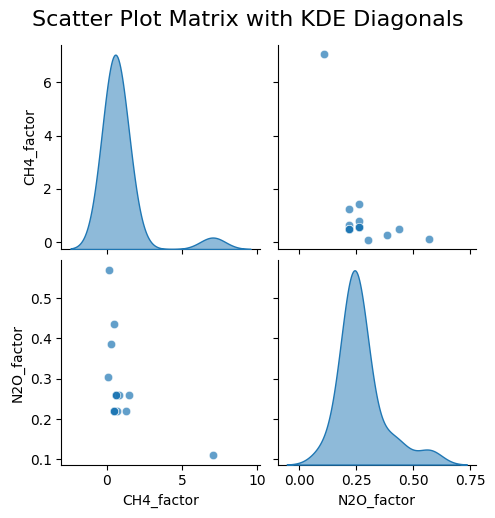

In [8]:
# Create a scatterplot matrix with Seaborn
pairplot = sns.pairplot(
    averaged_data,
    diag_kind="kde",  # KDE plots on diagonal
    plot_kws={'alpha': 0.7},  # Transparency for scatter plots
    diag_kws={'fill': True, 'alpha': 0.5},  # KDE plot settings
    corner=False
)

# Add plot titles and adjust layout
pairplot.figure.suptitle("Scatter Plot Matrix with KDE Diagonals", y=1.02, fontsize=16)
pairplot.figure.subplots_adjust(top=0.95)

# Save the figure as an image to be displayed
pairplot.figure.savefig("scatter_kde_matrix.png", bbox_inches='tight')

# Optionally display the Seaborn pairplot
plt.show()

- From this SPLOM we can infer that there is an outlier value lying in the given data.
- This outlier belongs to the Aviation Industry emission
- We can further analyse the temporal trend in the emissions from this industry by plotting a Parallel Coordinates Plot in the next iteration

We now create a PCP using the same data with axes being the average of CH4 and N2O emission values for each vehicle type (non-road) of the years 2011,2014,2015

- We again clean this daa to change column name format
- additionally, we create a new Feature of Average emissions

In [9]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
data = pd.read_excel(file_path, sheet_name='non-road')

# Rename columns for clarity
data.rename(columns={
    'N2O Factor \n(g / gallon) ': 'N2O_factor',
    'CH4 Factor \n(g / gallon) ': 'CH4_factor',
    'Year': 'Year'
}, inplace=True)

# Filter data for the relevant years
filtered_data = data[data['Year'].isin([2011, 2014, 2015])]

# Calculate the average of CH4 and N2O factors for each Vehicle Type and Year
filtered_data['Avg_CH4_N2O'] = filtered_data[['CH4_factor', 'N2O_factor']].mean(axis=1)

# Pivot the data to create columns for each year
pivoted_data = filtered_data.pivot(index='Vehicle Type', columns='Year', values='Avg_CH4_N2O').reset_index()

# Rename columns for clarity
pivoted_data.columns.name = None
pivoted_data.rename(columns={2011: 'Avg_2011', 2014: 'Avg_2014', 2015: 'Avg_2015'}, inplace=True)


Creating the PCP:

In [10]:

# Create a Parallel Coordinates Plot
fig = px.parallel_coordinates(
    pivoted_data,
    dimensions=['Avg_2011', 'Avg_2014', 'Avg_2015'],  # Average of CH4 and N2O for each year
    color='Avg_2011',  # Color based on the average of CH4 and N2O in 2011
    color_continuous_scale='Viridis',
    labels={
        'Avg_2011': 'Avg CH₄ + N₂O (2011)',
        'Avg_2014': 'Avg CH₄ + N₂O (2014)',
        'Avg_2015': 'Avg CH₄ + N₂O (2015)'
    }
)

# Update layout for aesthetics
fig.update_layout(
    margin=dict(t=50, l=75, r=25, b=25),
    title_font_size=16,
    width=800
)

# Display the PCP
fig.show()


- From this plot, we can infer that the outlier value is very far away from the other values and that it contributes very heavily to both CH4 and N2O emissions.\n
- Another thing to note is that this plot is not quite interpretable because the outlier value has cramped all the other values to the lower bound and we can't discretely discern theem or their trends.

Thus, we create a PCP using the same data, but this time we feature engineer such that we get the log(avg(CH4 emissions & N2O emissions)) as a column

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the Excel file
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
data = pd.read_excel(file_path, sheet_name='non-road')

# Rename columns for clarity
data.rename(columns={
    'N2O Factor \n(g / gallon) ': 'N2O_factor',
    'CH4 Factor \n(g / gallon) ': 'CH4_factor',
    'Year': 'Year'
}, inplace=True)

# Filter data for the relevant years
filtered_data = data[data['Year'].isin([2011, 2014, 2015])]

# Calculate the average of CH4 and N2O factors for each Vehicle Type and Year
filtered_data['Avg_CH4_N2O'] = filtered_data[['CH4_factor', 'N2O_factor']].mean(axis=1)

# Apply log transformation to avoid issues with very small values or zeros
filtered_data['Log_Avg_CH4_N2O'] = np.log(filtered_data['Avg_CH4_N2O'].replace(0, np.nan))

# Pivot the data to create columns for each year
pivoted_data = filtered_data.pivot(index='Vehicle Type', columns='Year', values='Log_Avg_CH4_N2O').reset_index()

# Rename columns for clarity
pivoted_data.columns.name = None
pivoted_data.rename(columns={2011: 'Log_Avg_2011', 2014: 'Log_Avg_2014', 2015: 'Log_Avg_2015'}, inplace=True)


In [12]:

# Create a Parallel Coordinates Plot
fig = px.parallel_coordinates(
    pivoted_data,
    dimensions=['Log_Avg_2011', 'Log_Avg_2014', 'Log_Avg_2015'],  # Log-transformed averages
    color='Log_Avg_2011',  # Color based on log-transformed averages in 2011
    color_continuous_scale='Viridis',
    labels={
        'Log_Avg_2011': 'Log(Avg CH₄ + N₂O) (2011)',
        'Log_Avg_2014': 'Log(Avg CH₄ + N₂O) (2014)',
        'Log_Avg_2015': 'Log(Avg CH₄ + N₂O) (2015)'
    }
)

# # Update layout for aesthetics
# fig.update_layout(
#     margin=dict(t=50, l=25, r=25, b=25),
#     title_font_size=16
# )

fig.update_layout(
    margin=dict(t=50, l=75, r=25, b=25),
    title_font_size=16,
    width=800  # Reduce the overall plot width
)


# Display the PCP
fig.show()


We can easily infer from this plot the lower values as they are now evenly distributed. 
- While some industries have had an increasing and then a stable average emission values, there are a few industries which have reduced their emission from the year 2014 to 2015.
- Aviation Industry still has the highest log average emission and is not at all decreasing which could be an area of concern

With this, we come to a conclusive end to this set of iterations of our VA workflow. The findings in this part-2 can be verified using the article referenced in the report.

## Part-3 : Scatter Plot Matrix for CH4 and N2O Emissions and Clustering techniques

We now come to the Commodity specific analysis, in which we will analyse the Vehicle emissions data and try to gain insights from them

The additional dataset used for this is described below:

- **Vehicle Type:** Specifies the category of the vehicle, such as Passenger Cars, Light-Duty Trucks (e.g., vans, pickup trucks, SUVs), Heavy-Duty Vehicles, and Motorcycles.
- **CH₄ Factor (g CH₄ / vehicle-mile):** Represents the methane emission factor, measured in grams per vehicle-mile. This factor varies by vehicle type and operational characteristics.
- **N₂O Factor (g N₂O / vehicle-mile):** Represents the nitrous oxide emission factor, measured in grams per vehicle-mile. Like methane, this factor is dependent on the vehicle type and other influencing factors.


We clean this dataset as well, similar to before, to create easy-to-use column names

In [13]:

# Load the dataset
file_path = 'Data/EF-2014.xlsx'  # Replace with the correct path if needed
df = pd.read_excel(file_path, sheet_name='Vehicle analysis')

df.columns
# Task 1: Renaming columns
df.rename(columns={
    'N2O Factor \n(g N2O / vehicle-mile)': 'N2O_factor',
    'CH4 Factor \n(g CH4 / vehicle-mile)': 'CH4_factor'
}, inplace=True)

# Extract relevant data
data = df[['N2O_factor', 'CH4_factor']].dropna()

To understand the data in these two numerical columns, we create a SPLOM and analyse the KDE and scatter plots in it.

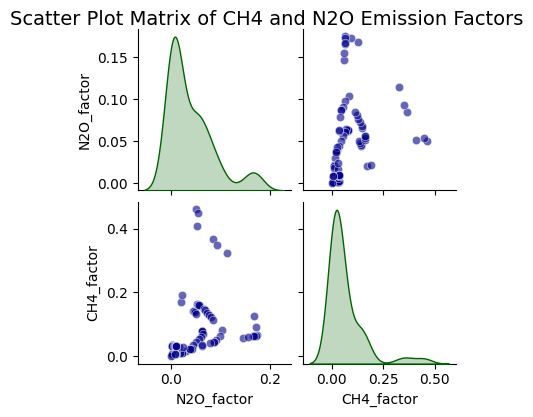

In [14]:

# Create scatter plot matrix
sns.pairplot(data, diag_kind='kde', height=2,plot_kws={'color': 'darkblue', 'alpha': 0.6},diag_kws={'color': 'darkgreen'})
plt.suptitle("Scatter Plot Matrix of CH4 and N2O Emission Factors", fontsize=14, y=1.02)
plt.show()


- We can clearly see in this plot, the presence of some values above the average of either x or y axis.
- There are a lot of values crowded near the origin which show some common features between them.
- Due to these naturally visible clusters in our data, we now leverage the SubFlow-3 in our next iteration and create a clustering model to group common data points into separate clusters

This is a close-up view from the scatter plot made in the non-diagonal elements of the SPLOM plot in the previous iterations. We can clearly make out the possible clusters through this plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14908\998335684.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



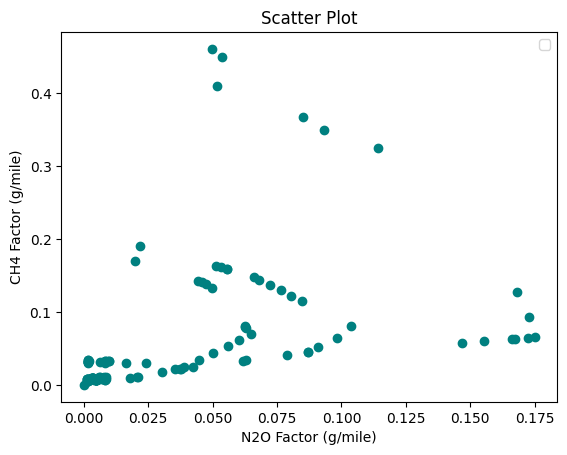

In [15]:
plt.scatter(data['N2O_factor'],data['CH4_factor'], c='teal')
plt.title(f'Scatter Plot')
plt.xlabel('N2O Factor (g/mile)')
plt.ylabel('CH4 Factor (g/mile)')
plt.legend()
plt.show()

Before applying clustering, we need to find out the optimal number of clusters suitable for this data. To find that out, we use the classic elbow method.

We plot a line chart showing variation in WCSS (Within-Cluster Sum of Squares) values with the number of clusters 'k'.

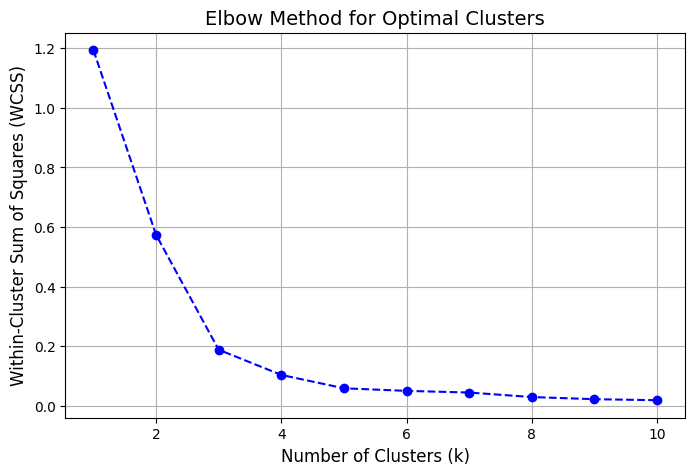

In [16]:
# Elbow method for determining optimal clusters
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)  # Test for cluster counts from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()



- We can clearly see the elbow shape of the curve, where there is a sharp decrease in the WCSS values for k=2 and k=3.
- After k=3, the WCSS values change negligibly and hence are of no use.
- Thus, the optimal number of clusters to be used = 3.

We now train our model using the data and setting the parameter of optimal clusters as 3. After training, we assign cluster values to each datapoint

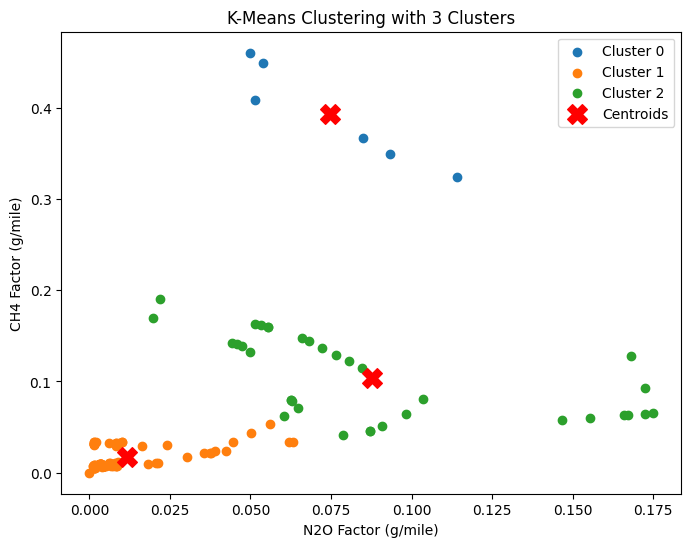

In [17]:
# Function to perform K-Means clustering and plot
def kmeans_clustering_and_plot(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['N2O_factor', 'CH4_factor']])

    # Scatter plot
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        clustered_data = data[data['Cluster'] == cluster]
        plt.scatter(clustered_data['N2O_factor'], clustered_data['CH4_factor'], label=f'Cluster {cluster}')

    # Mark centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel('N2O Factor (g/mile)')
    plt.ylabel('CH4 Factor (g/mile)')
    plt.legend()
    plt.show()

# Task 2: Apply K-Means clustering for 3 and 4 clusters
kmeans_clustering_and_plot(data, 3)

In this clustering outcome, we can see that there are 3 clusters created. To better interpret the clusters, they are categorized as follows:

- **Cluster 0 (Old Cars):** Vehicles in this cluster generally exhibit **high emission factors** for both CH₄ and N₂O. These vehicles likely represent older models with outdated emission control technologies.
- **Cluster 1 (Middle-generation Cars):** Vehicles in this cluster have **moderate CH₄** emissions and **relatively low N₂O** emissions. They likely represent mid-range models with improved, yet not fully modern, emission controls.
- **Cluster 2 (Latest Cars):** This cluster contains vehicles with **low emissions** for both CH₄ and N₂O, representing the latest models equipped with advanced emission control systems.


The clustering output successfully groups vehicles into distinct categories based on their emission profiles. The clear distinction between the clusters highlights the technological evolution in vehicle emission control systems. This analysis provides a foundation for targeting high-emission vehicles (Cluster 0) for retrofitting or replacement, while emphasizing the success of modern emission standards seen in Cluster 2.

The findings from the clustering analysis, which categorized vehicles into three groups (Old Cars, Middle Cars, and Latest Cars), align with broader trends in vehicle emissions and advancements in technology. Link for the reference of the same has been added in the report.

With this, I conclude the Task-3 of this Visual Analytics workflow.
## Key Takeaways from Task-3

### Part-1: Heatmap and Choropleth of Emissions
- The task began with a heatmap to identify significant emissions by gas type across industries, highlighting **Air Transportation** as a major contributor.
- To complement this, a **choropleth map** was created to visualize region-wise CO₂ emissions in the US based on electricity board-wise emission factors.
- Key observations:
  - Regions such as the **Rocky Mountain Power Area (RMPA)** and **SPP South** showed the highest CO₂ emissions.
  - The visualization effectively compared emissions geographically, emphasizing areas with critical emission levels.
- These insights laid the foundation for deeper analysis into region-specific and sectoral emissions.

### Part-2: Scatter Plot Matrix (SPLOM)
- The SPLOM visualized relationships between CH₄ and N₂O emission factors using pairwise scatter plots and KDE diagonals.
- Key insights:
  - Highlighted an extreme outlier in CH₄ emissions—**Aviation Gasoline Aircraft**.
  - Demonstrated weak correlation between CH₄ and N₂O emissions across vehicle types.
- SPLOM effectively identified emission variability, emphasizing the importance of focusing on high-emission sources.
- The PCP visualized trends in combined CH₄ and N₂O averages across the years 2011, 2014, and 2015.
- Challenges:
  - A significant outlier skewed the y-axis, compressing other data points, and reducing interpretability.
  - While it revealed overall trends, it required refinement to enhance readability.
- Next steps included applying logarithmic transformations to mitigate the impact of outliers for better insights.

### Part-3: Vehicle Emissions Analysis and Clustering Insights

- A scatter plot was created using CH\(_4\) (methane) and N\(_2\)O (nitrous oxide) emission factors to visualize emission patterns across different vehicles.
- K-Means clustering was applied to group vehicles based on their emission profiles, resulting in three distinct clusters:
  - **Old Vehicles:** High emission factors, representing older models with outdated technologies.
  - **Mid-Generation Vehicles:** Moderate emission factors, reflecting partial adoption of emission-reducing technologies.
  - **Latest Vehicles:** Low emission factors, indicating state-of-the-art technologies in modern vehicles.
- The clustering revealed clear trends in emissions, highlighting technological progress and the impact of modern emission control measures.
- These insights emphasize the need to target older vehicle groups for retrofitting or replacement to further reduce emissions.
